# Theis (1935) no-flow boundary model
 
This notebook demonstrates how to use **OpenHyTest** for the interpretation of a pumping test with the Theis (1935) no-flow boundary model

Copyright 1998-2020 - Philippe Renard, Nathan Dutler & Bernard Brixel

First, we append the openhytest folder to the system path using the 'sys' library and import than the 'openhytest' library as ht. In addition, we import the 'matplotlib.pyplot' library for plotting and the 'pandas' library for data management.


In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import openhytest as ht
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Load the data
The data set for this example has been typed from: G. de Marsily, Pumping test in Niger.

The diagnostic plot shows a doubling of the derivative at a time of 1e5 seconds indicating a possible no-flow boundary effect. We interpret the data with the Theis no-flow boundary model.

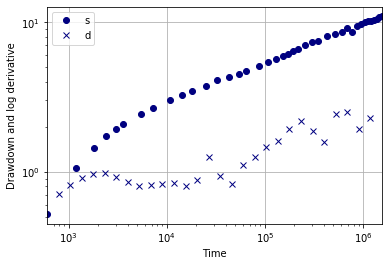

In [2]:
data = pd.read_csv('../data/thn_ds1.txt', header=None,sep=" ",names=['t','s'], dtype={'t': 'float64', 's': 'float64'})
ht.diagnostic(data)

## Model 

1) We initialize the Theis no-flow boundary model with 0.0132 m^3/s and radius of 20 m and show first the typecurve.

2) Then a first model parameter guess is done and showing the results with the trial function.

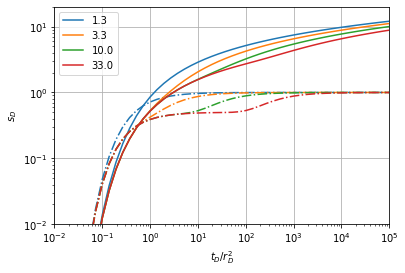

estimated parameter vector: [2.08083534e+00 4.09480142e+02 5.31857688e+04]


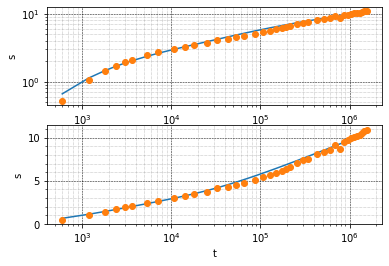

T =  0.0011623637077365074 m2/s
S =  0.0026723515663906582 -
Ri =  227.9351449908511 m


In [22]:
model = ht.Theis_noflow(Q=0.0132,r=20, df=data)
model.plot_typecurve()
p = model.guess_params()
print("estimated parameter vector:",p)
model.trial()

Let use proceed with the automatic fit and directly report the results of the interpretation.

`gtol` termination condition is satisfied.
Function evaluations 3, initial cost 7.4091e-01, final cost 7.4091e-01, first-order optimality 3.33e-10.


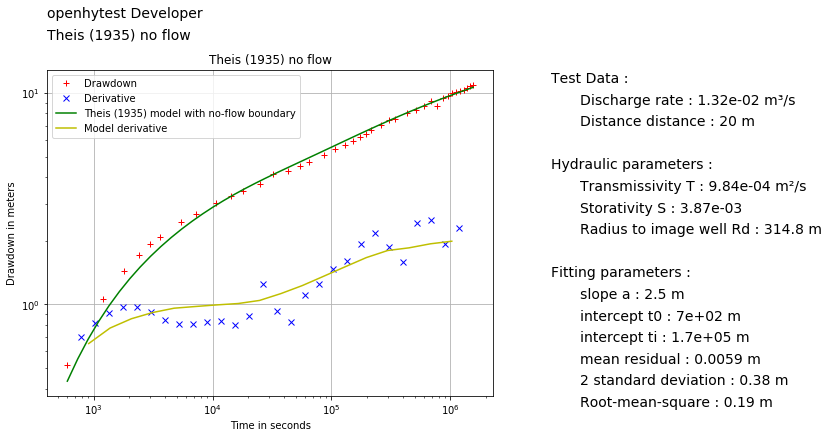

In [15]:
model.rpt(option_fit='trf', ttle='Theis (1935) no flow', author='openhytest Developer', filetype='pdf', reptext='Report_Theis_noflow_example')

The estimated transmissivity is 9.8e-4 m2/s, the storativity is 3.9e-3, and the distance to the image well is 315 m. These numbers are close to the estimation provided by de Marsily.

T  = 1.0e-3 [m2/s]

S  = 3.7e-3

ri = 287 m

## Laplace inversion

First, let us try the laplace solution and inversion for the drawdown and the derivative.
Then we, compare the solution with the direct calculalted drawdown and derivative using mean residuals, standard deviation and RMS.

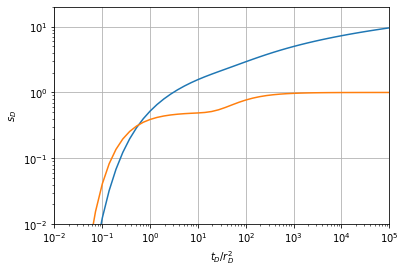

In [16]:
td = np.logspace(-2, 5)
sdn = model._laplace_drawdown(td, 'dehoog')
sd = list(sdn)
plt.loglog(td, sd)
ddn = model._laplace_drawdown_derivative(td, 'dehoog')
dd = list(ddn)
plt.loglog(td, dd)
plt.xlabel('$t_D / r_D^2$')
plt.ylabel('$s_D$')
plt.xlim((1e-2, 1e5))
plt.ylim((1e-2, 20))
plt.grid('True')

In [17]:
sd2 = model.dimensionless(td)
residual = sd-sd2

mr = np.mean(residual) #mean resiudal
print(mr)
sr = 2 * np.std(residual) #standard deviation
print(sr)
rms = np.sqrt(np.mean(residual**2))
print(rms)

6.05766538310504e-12
1.22322880273965e-11
8.60828249362009e-12


In [18]:
dd2 = model.dimensionless_logderivative(td)
residual2 = dd-dd2

mr2 = np.mean(residual2) #mean resiudal
print(mr2)
sr2 = 2 * np.std(residual2) #standard deviation
print(sr2)
rms2 = np.sqrt(np.mean(residual2**2))
print(rms2)

9.59660138065863e-13
1.71937496523137e-12
1.28841381099346e-12
